# Supervised Learning: Simple Classification (Iris dataset)

This notebook implements a pedagogical end-to-end ML pipeline :
- Loading the Iris dataset
- Exploratory Data Analysis (pairplot, histograms)
- Train/test split + scaling
- Training two simple classifiers: Logistic Regression and K-Nearest Neighbors (KNN)
- Evaluating with accuracy and confusion matrix (visualized)
- Providing suggestions for exercises and improvements

**Dependencies**: numpy, pandas, matplotlib, seaborn, scikit-learn

In [12]:
# Imports
import numpy as np  # numerical arrays and operations
import pandas as pd  # DataFrame for tabular data handling
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # statistical visualizations

from sklearn.datasets import load_iris  # built-in Iris dataset
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.preprocessing import StandardScaler  # standardization
from sklearn.linear_model import LogisticRegression  # linear classifier
from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # evaluation metrics

In [13]:
# Utility plotting settings
sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (8, 5)  # default figsize for charts

In [25]:
# Load the Iris dataset into a pandas DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


We load the Iris dataset and create a pandas DataFrame to explore it.

Steps and concepts:

1. Load the dataset
-------------------
iris = load_iris()  
- Loads the classic Iris dataset from scikit-learn.  
- It contains measurements of 150 flowers from 3 species.

2. Create a DataFrame
---------------------
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  
- Converts the data to a table format (rows = observations, columns = features).  
- Columns are named according to the feature names:  
  - sepal length (cm)  
  - sepal width (cm)  
  - petal length (cm)  
  - petal width (cm)

3. Add the target variable
--------------------------
df['target'] = iris.target  
- Numeric labels (0, 1, 2) representing the species.  

df['target_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)  
- Adds a readable species name for each observation.  
- Makes analysis and visualization easier.

4. Inspect the first 10 rows
-----------------------------
df.head(10)  
- Displays the first 10 observations of the dataset.  
- Useful to quickly understand the structure, feature ranges, and species distribution.

Summary:
--------
The DataFrame now contains 150 rows and 6 columns:
- 4 numerical features describing the flowers
- 1 numeric target (0, 1, 2)
- 1 categorical target with species names (setosa, versicolor, virginica)

This setup allows further exploration, statistical analysis, and modeling, such as classification tasks.

In [29]:
# Show basic statistics and info
print("First 5 rows:")
print(df.head())

print("\nDescriptive statistics (numeric features):")
print(df.describe().T)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Descriptive statistics (numeric features):
                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.7


Plotting pairplot (this may take some seconds)...


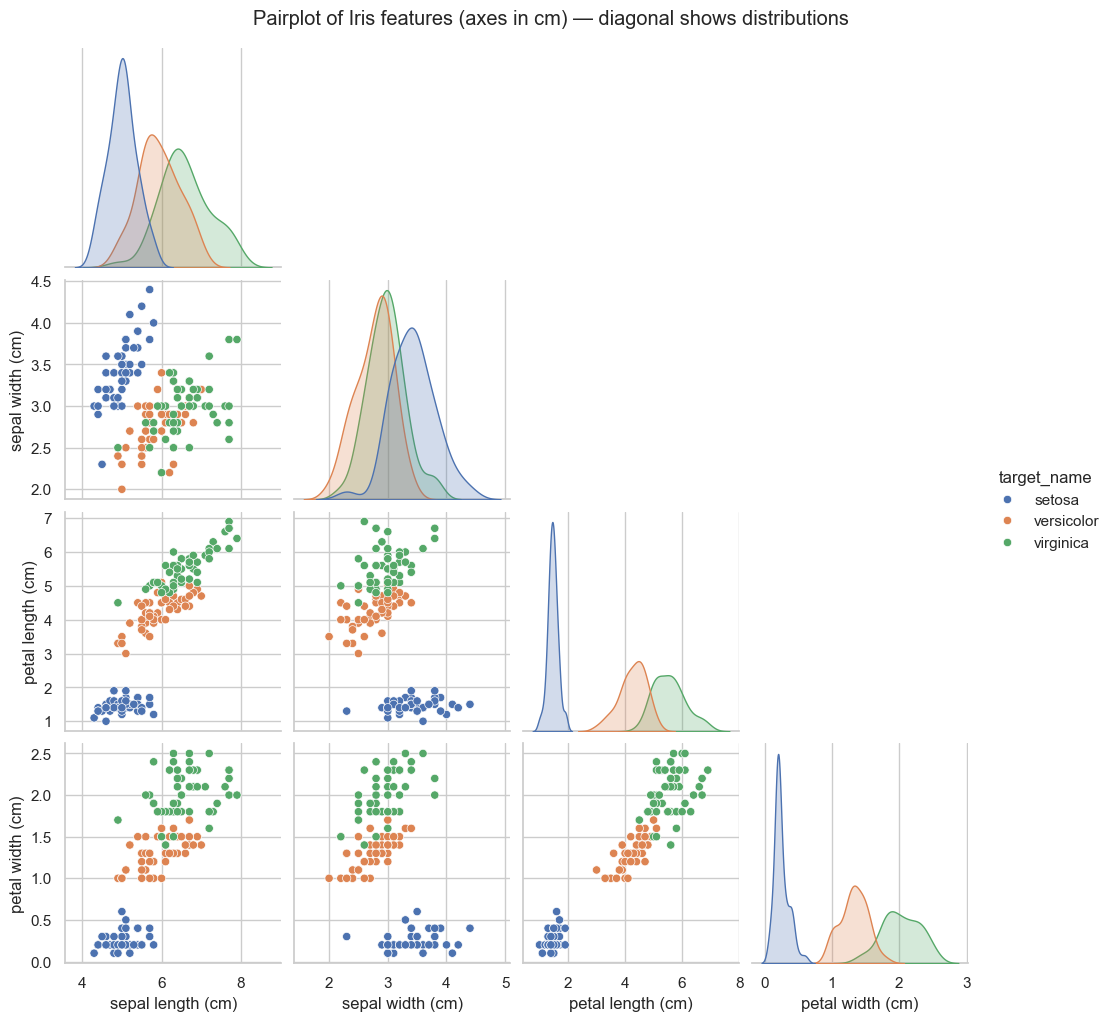

In [40]:
# Exploratory Data Analysis - pairplot
print("\nPlotting pairplot (this may take some seconds)...")
pairgrid = sns.pairplot(df, vars=df.columns[:4].tolist(), hue="target_name", corner=True)
pairgrid.fig.suptitle("Pairplot of Iris features (axes in cm) — diagonal shows distributions", y=1.02)
plt.show()

Exploratory Data Analysis: Pairplot of Iris features

We use a pairplot to visualize relationships between all feature pairs in the dataset.

1. Purpose of pairplot
----------------------
- Shows scatter plots for each pair of numerical features.
- Diagonal shows the distribution of each individual feature (histograms or KDE).
- Helps detect correlations, patterns, clusters, or outliers.

2. Parameters used
------------------
- vars=df.columns[:4].tolist() -> select only the 4 numerical features (sepal length, sepal width, petal length, petal width)
- hue="target_name" -> color points according to species (setosa, versicolor, virginica)
- corner=True -> only shows lower triangle of plots to avoid repetition
- fig.suptitle(...) -> adds a descriptive title above the figure

3. Independent and dependent variables
--------------------------------------
- All features are treated as independent for visualization purposes.
- No dependent variable here; the plot is for exploratory analysis, not prediction.
- hue (target_name) is used to see if species form distinct clusters.

4. Interpretation
-----------------
- Scatter plots: show relationships between feature pairs.  
  Positive/negative trends indicate correlation.  
- Diagonal plots: show distributions of each feature, useful to see skewness or range.  
- Coloring by species helps identify which features separate species well.  
  For example, petal length and width often clearly separate setosa from other species.

5. Practical use
----------------
- Detect patterns and correlations before modeling.  
- Identify features that might be useful for classification.  
- Spot outliers or unusual observations visually.

Summary:
--------
The pairplot is a powerful first step in EDA to understand feature distributions, relationships, and class separation in the Iris dataset.


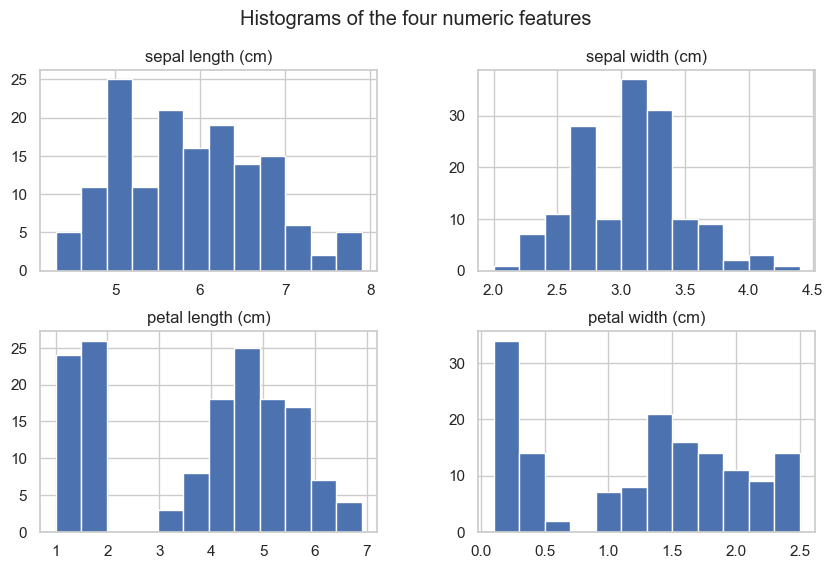

In [41]:
# Histograms for each numeric feature
df[df.columns[:4]].hist(bins=12, figsize=(10,6))
plt.suptitle("Histograms of the four numeric features")
plt.show()

In [42]:
# Prepare train/test split and scale features
X = df[df.columns[:4]].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTrain/test prepared: Train samples = {}, Test samples = {}".format(len(y_train), len(y_test)))


Train/test prepared: Train samples = 120, Test samples = 30



Training Logistic Regression...
Evaluating Logistic Regression on test set:
Accuracy: 0.9333

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



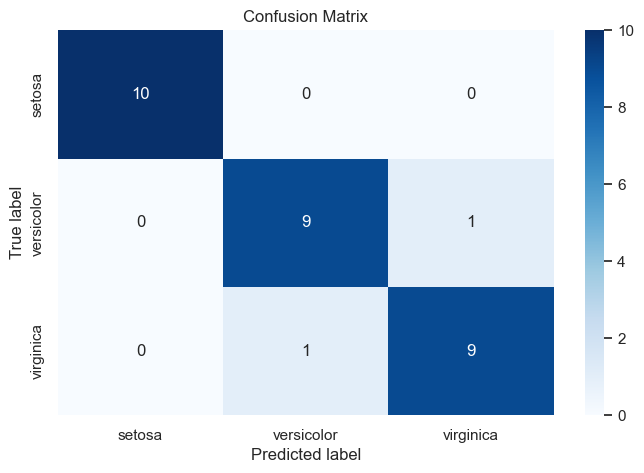

In [43]:
# Train Logistic Regression
print("\nTraining Logistic Regression...")
logreg_model = LogisticRegression(random_state=0, max_iter=200)
logreg_model.fit(X_train_scaled, y_train)

print("Evaluating Logistic Regression on test set:")
y_pred_logreg = logreg_model.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Accuracy: {:.4f}".format(acc_logreg))
print("\nClassification report:")
print(classification_report(y_test, y_pred_logreg, target_names=df['target_name'].cat.categories.tolist()))

sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=df['target_name'].cat.categories.tolist(), yticklabels=df['target_name'].cat.categories.tolist())
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


Training KNN (k=3)...
Evaluating KNN on test set:
Accuracy: 0.9333

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



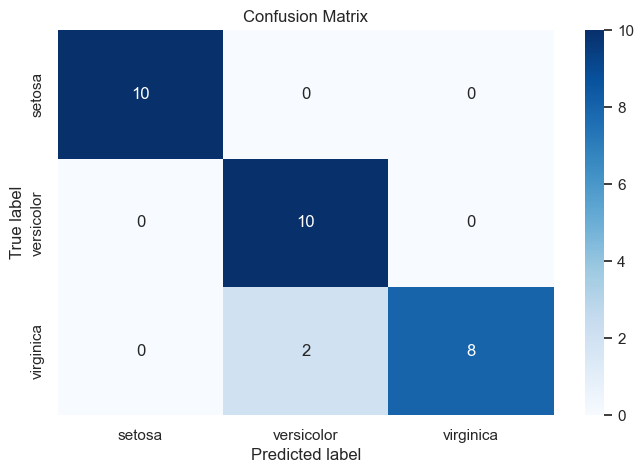

In [44]:
# Train KNN (k=3) and evaluate
print("\nTraining KNN (k=3)...")
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

print("Evaluating KNN on test set:")
y_pred_knn = knn_model.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy: {:.4f}".format(acc_knn))
print("\nClassification report:")
print(classification_report(y_test, y_pred_knn, target_names=df['target_name'].cat.categories.tolist()))

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=df['target_name'].cat.categories.tolist(), yticklabels=df['target_name'].cat.categories.tolist())
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [45]:
# Summary of accuracies
print("\nSummary of accuracies on test set:")
print(" - Logistic Regression accuracy: {:.4f}".format(acc_logreg))
print(" - KNN (k=3) accuracy:            {:.4f}".format(acc_knn))


Summary of accuracies on test set:
 - Logistic Regression accuracy: 0.9333
 - KNN (k=3) accuracy:            0.9333


## Conclusions and suggested improvements
- Observe which classes are well-separated (e.g. 'setosa' often perfectly separable).
- Check confusion matrices to see which classes are confused (versicolor vs virginica).
- Suggested experiments:
    * Try different k values for KNN and plot accuracy vs k.
    * Use cross-validation (cross_val_score) for a more robust estimate.
    * Try feature scaling alternatives (MinMaxScaler) or no scaling.
    * Add polynomial features and see if LogisticRegression improves.
    * Compute learning curves to observe overfitting/underfitting behavior.